In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("../../data/3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


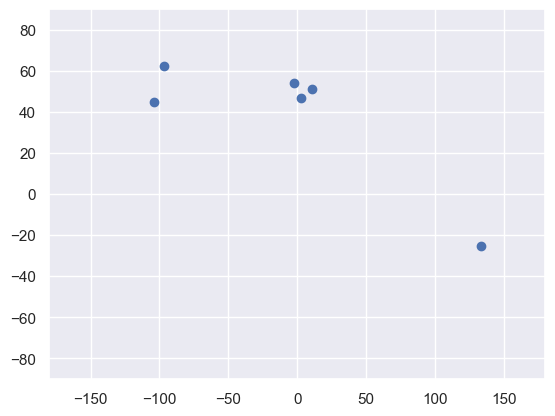

In [5]:
plt.scatter(data["Longitude"], data["Latitude"])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

CSVデータから目的の列だけを抽出する

In [6]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


クラスタリングのためK平均法を用いて引数に入力されたグループ分けを行う

In [12]:
kmeans = KMeans(3)
kmeans.fit(x)

/Users/k21116kk/src/data-science/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

予測されたクラスタデータを見る
- N番目のデータはどのクラスタに属するかを0、1で閲覧できる

In [13]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

/Users/k21116kk/src/data-science/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 0, 0, 0, 1], dtype=int32)

In [14]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


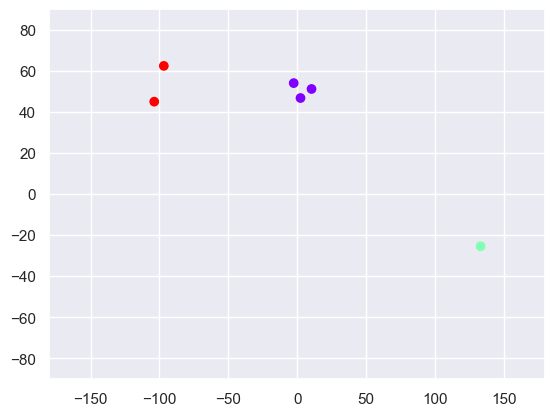

In [15]:
plt.scatter(
    data_with_clusters["Longitude"],
    data_with_clusters["Latitude"],
    c=data_with_clusters["Cluster"],
    cmap="rainbow",
)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

### 言語情報をもとにクラスタリングする

ダミー変数を定義

In [16]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map(
    {"English": 0, "French": 1, "German": 2}
)
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [21]:
x = data_mapped.iloc[:, 1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [22]:
kmeans = KMeans(3)
kmeans.fit(x)

/Users/k21116kk/src/data-science/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [23]:
data_with_clusters = data_mapped.copy()
data_with_clusters["Cluster"] = kmeans.fit_predict(x)
data_with_clusters

/Users/k21116kk/src/data-science/.venv/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


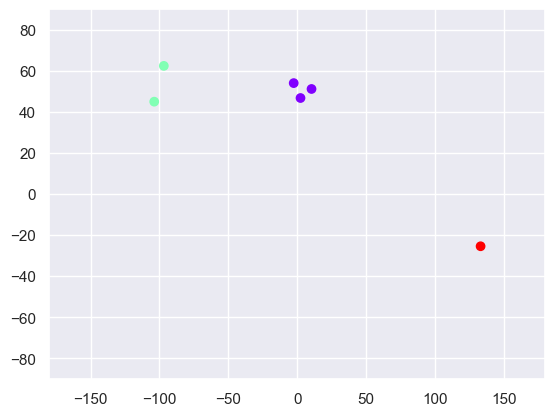

In [24]:
plt.scatter(
    data_with_clusters["Longitude"],
    data_with_clusters["Latitude"],
    c=data_with_clusters["Cluster"],
    cmap="rainbow",
)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()